In [ ]:
# 1. Частина 1. Підготовка даних
# 1.1 Завантажити дані згідно варіанту.
# 1.2 Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15
# 1.3 Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.
# 1.4 Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.
# 1.5 Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних


Частина 1. Підготовка даних

1.1 Завантажити дані згідно варіанту.

In [ ]:
import seaborn as sns
import pandas as pd

# Завантажуємо датасет "planet"
df = sns.load_dataset("planets")
print(df.shape)
print(df.isna().mean())

df_non_null = df[df['mass'].notnull()]
df_non_null.tail(10)

(1035, 6)
method            0.000000
number            0.000000
orbital_period    0.041546
mass              0.504348
distance          0.219324
year              0.000000
dtype: float64


,method,number,orbital_period,mass,distance,year
638,Radial Velocity,1,511.09800,8.820,31.33,2002
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013
784,Radial Velocity,3,580.00000,0.947,135.00,2012
913,Radial Velocity,1,677.80000,19.800,NaN,2007
914,Radial Velocity,1,6.95800,0.340,NaN,2014
915,Radial Velocity,1,5.11800,0.400,NaN,2014
916,Radial Velocity,1,121.71000,1.540,NaN,2014


In [ ]:
df_non_null.describe()

,number,orbital_period,mass,distance,year
count,513.000000,513.000000,513.000000,498.000000,513.000000
mean,1.717349,850.184862,2.638161,52.068213,2007.452242
std,1.164259,1515.656126,3.818617,46.596041,4.154506
min,1.000000,1.328300,0.003600,1.350000,1989.000000
25%,1.000000,39.845000,0.229000,24.497500,2005.000000
50%,1.000000,360.200000,1.260000,39.940000,2009.000000
75%,2.000000,990.000000,3.040000,59.332500,2011.000000
max,6.000000,17337.500000,25.000000,354.000000,2014.000000


1.2 Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15


In [ ]:
from sklearn.model_selection import train_test_split
df = df.dropna()
# Видалямє рядки де таргетна колонка mass = N/A, бо не можем предіктати на
df = df.dropna(subset=['mass'])

# Відділяємо ознаки і таргет
X = df.drop(columns='mass')
y = df['mass']

# Розбиваємо на train/val/test у пропорції 70/15/15
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print(f"Rows -> train: {len(X_train)}, val: {len(X_val)}, test: {len(X_test)}")

Rows -> train: 348, val: 75, test: 75


1.3 Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.



1.4 Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.

1.5 Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = ['number', 'orbital_period', 'distance', 'year']
cat_cols = ['method']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler(with_mean=True, with_std=True))
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols),
])

X_train_prep = preprocessor.fit_transform(X_train)
X_val_prep   = preprocessor.transform(X_val)
X_test_prep  = preprocessor.transform(X_test)

print("Shape after prep:", X_train_prep.shape, X_val_prep.shape, X_test_prep.shape)

Shape after prep: (348, 5) (75, 5) (75, 5)


Частина 2. Побудова дерева рішень


2.1 Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

depths = [3, 5, 10]
trees = {}

for max_depth in depths:
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X_train_prep, y_train)
    trees[max_depth] = tree

2.2 Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

Decision Tree (max_depth=3): Train R2=0.271, Val R2=-0.096


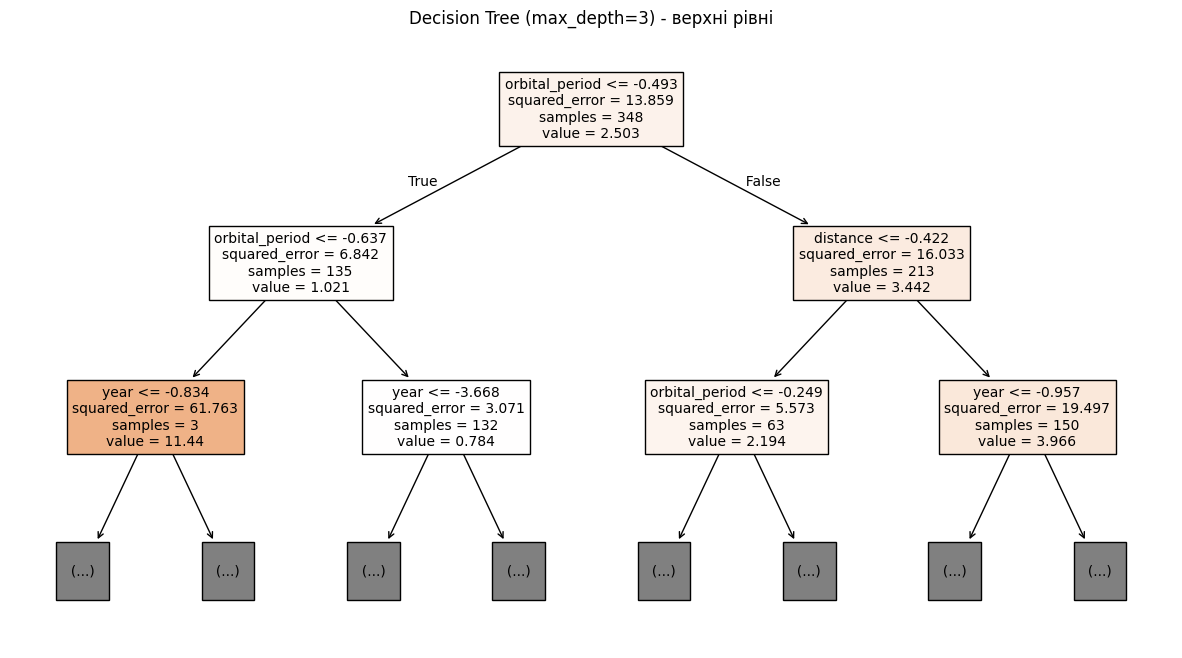

Decision Tree (max_depth=5): Train R2=0.502, Val R2=-0.178


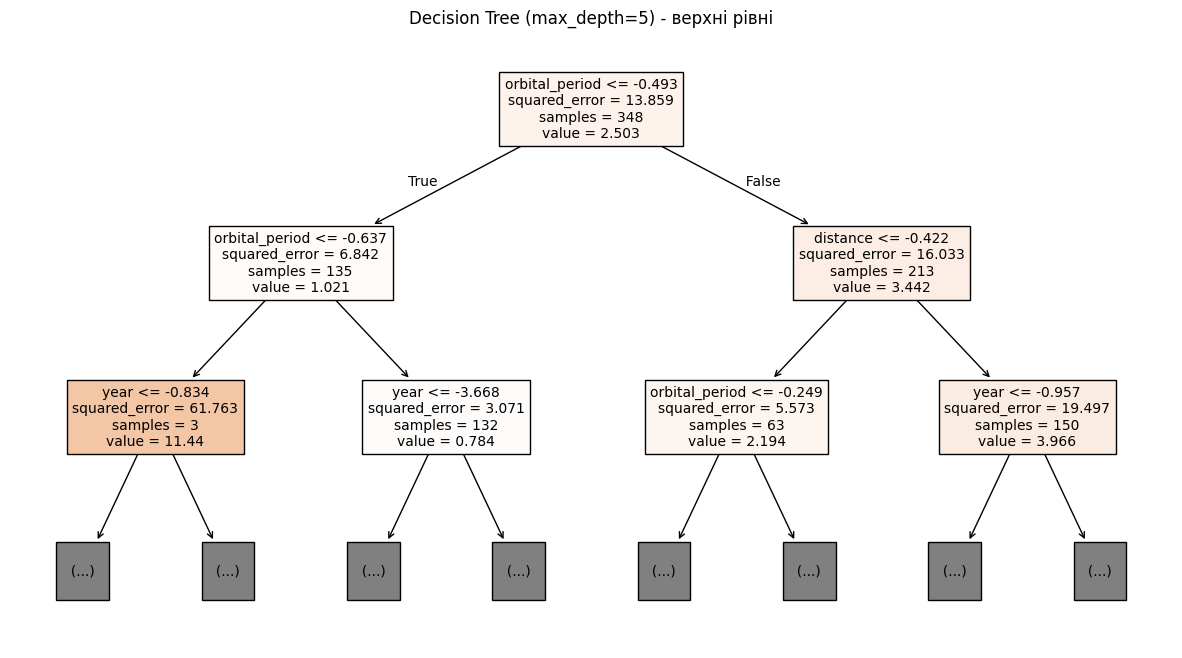

Decision Tree (max_depth=10): Train R2=0.916, Val R2=-0.736


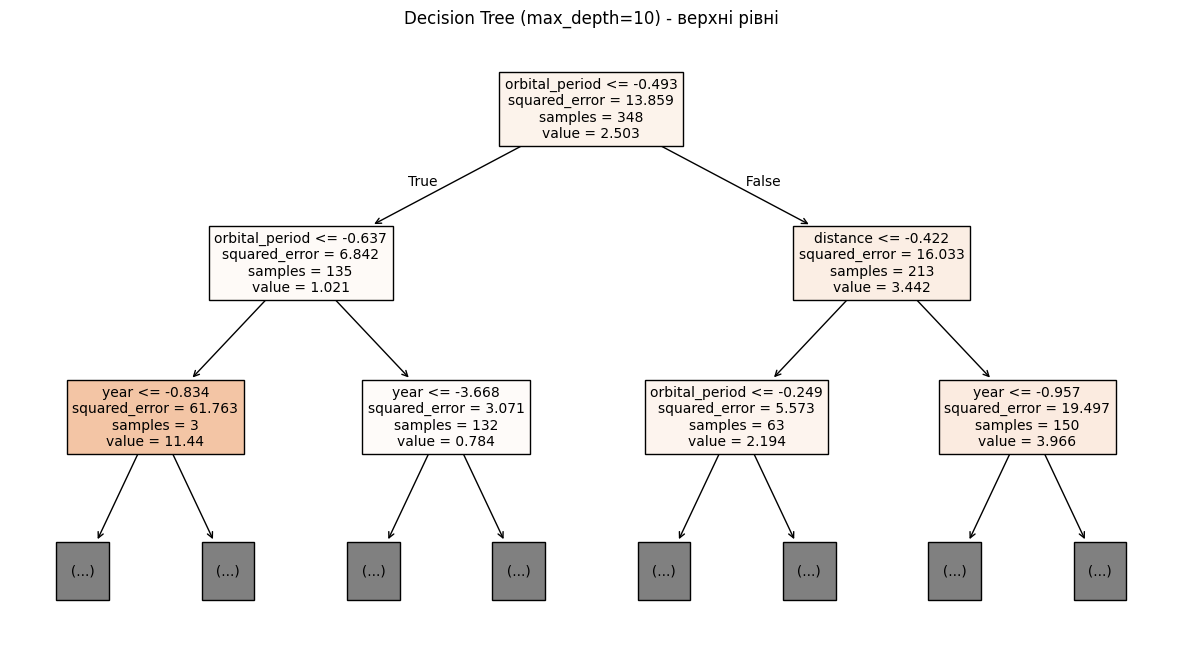

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for max_depth, tree in trees.items():
    # Прогнози
    y_train_pred = tree.predict(X_train_prep)
    y_val_pred = tree.predict(X_val_prep)

    # Точність (R2)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"Decision Tree (max_depth={max_depth}): Train R2={train_r2:.3f}, Val R2={val_r2:.3f}")

    # Візуалізація верхніх рівнів дерева (щоб графік не був дуже великим)
    plt.figure(figsize=(15,8))
    plot_tree(tree, max_depth=2, feature_names=num_cols + cat_cols, filled=True, fontsize=10)
    plt.title(f"Decision Tree (max_depth={max_depth}) - верхні рівні")
    plt.show()

2.3 Побудувати Random forest на основі даних.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, max_depth=2, random_state=42)
rf.fit(X_train_prep, y_train)

y_train_pred = rf.predict(X_train_prep)
y_val_pred = rf.predict(X_val_prep)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Random Forest: Train R2={train_r2:.3f}, Val R2={val_r2:.3f}")

Random Forest: Train R2=0.245, Val R2=0.093


Частина 3. Побудова k-nn

Побудувати 3 різні k-nn з різним k, типом алгоритму на основі даних згідно варіанту.

Візуалізувати отримані результати


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Дискретизуємо mass на 2 класи за медіаною
median_mass = y_train.median()
y_train_cl = (y_train > median_mass).astype(int)
y_val_cl   = (y_val   > median_mass).astype(int)

# 2. Будуємо 3 k-NN класифікатори
configs = [(3,'ball_tree'), (5,'kd_tree'), (10,'brute')]
for k, algo in configs:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm=algo)
    knn.fit(X_train_prep, y_train_cl)
    y_pred = knn.predict(X_val_prep)

    print(f"k={k}, alg={algo}:")
    print("  acc  =", accuracy_score(y_val_cl, y_pred))
    print("  prec =", precision_score(y_val_cl, y_pred))
    print("  rec  =", recall_score(y_val_cl, y_pred))
    print("  f1   =", f1_score(y_val_cl, y_pred))
    print()

k=3, alg=ball_tree:
  acc  = 0.7466666666666667
  prec = 0.7837837837837838
  rec  = 0.725
  f1   = 0.7532467532467533

k=5, alg=kd_tree:
  acc  = 0.72
  prec = 0.7317073170731707
  rec  = 0.75
  f1   = 0.7407407407407407

k=10, alg=brute:
  acc  = 0.6933333333333334
  prec = 0.7428571428571429
  rec  = 0.65
  f1   = 0.6933333333333334



Частина 4. Кінцева валідація

Обрахувати метрики, які відповідають задачі, порівняти їх та запропонувати варіанти покращення

In [ ]:
y_test_cl = (y_test > median_mass).astype(int)
y_test_pred = knn.predict(X_test_prep)

print("Test  acc  =", accuracy_score(y_test_cl, y_test_pred))
print("      prec =", precision_score(y_test_cl, y_test_pred))
print("      rec  =", recall_score(y_test_cl, y_test_pred))
print("      f1   =", f1_score(y_test_cl, y_test_pred))

Test  acc  = 0.56
      prec = 0.5333333333333333
      rec  = 0.45714285714285713
      f1   = 0.49230769230769234


# ВИСНОВОК: planets датасет колонки не мають ніякої залежності до таргету масси,  відопвідно значення не можна запредіктати. Потрібно вибрати iris датасет,  де можна явніше перевірити роботу ml.